In [1]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import copy
from sklearn import preprocessing

In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")
# print first 10 rows of dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [3]:
#df.isnull().values.any()
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [4]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:

df['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

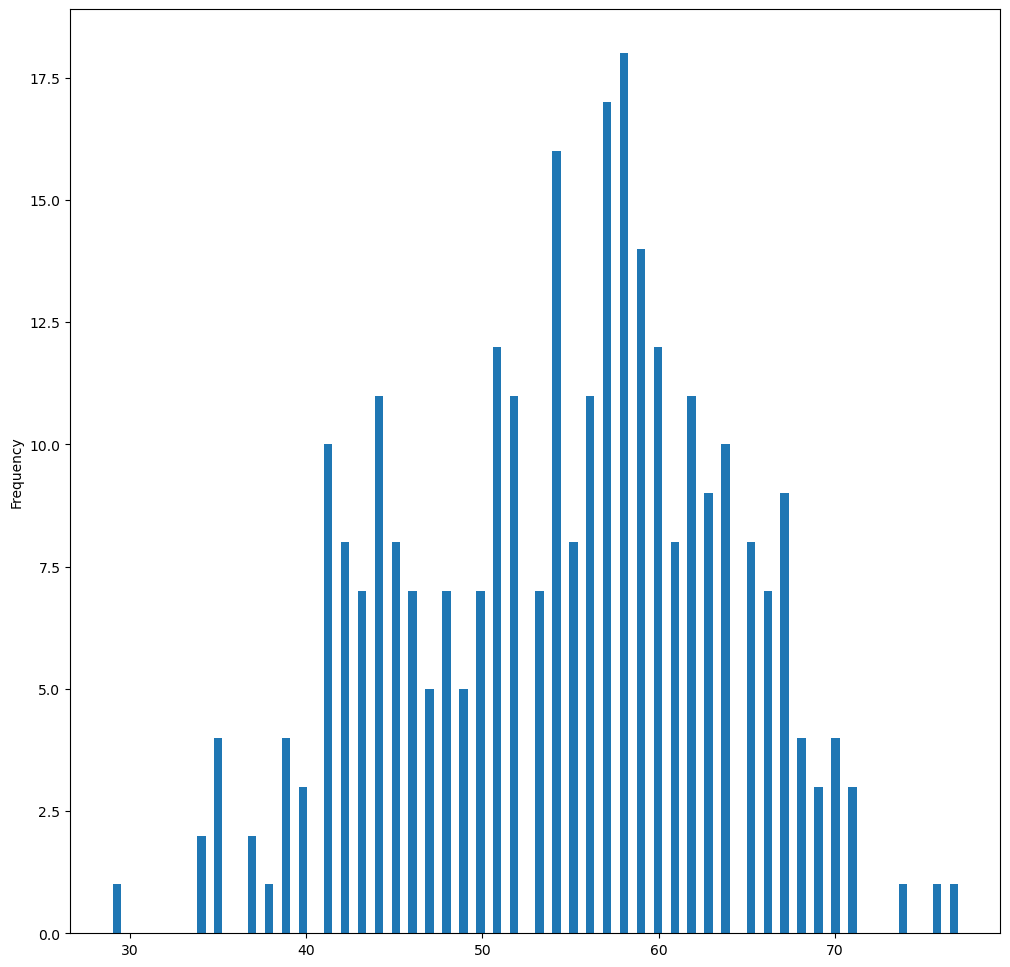

In [6]:
# plot histogram
df.age.plot(kind = 'hist', bins = 100, figsize = (12,12))
plt.show()

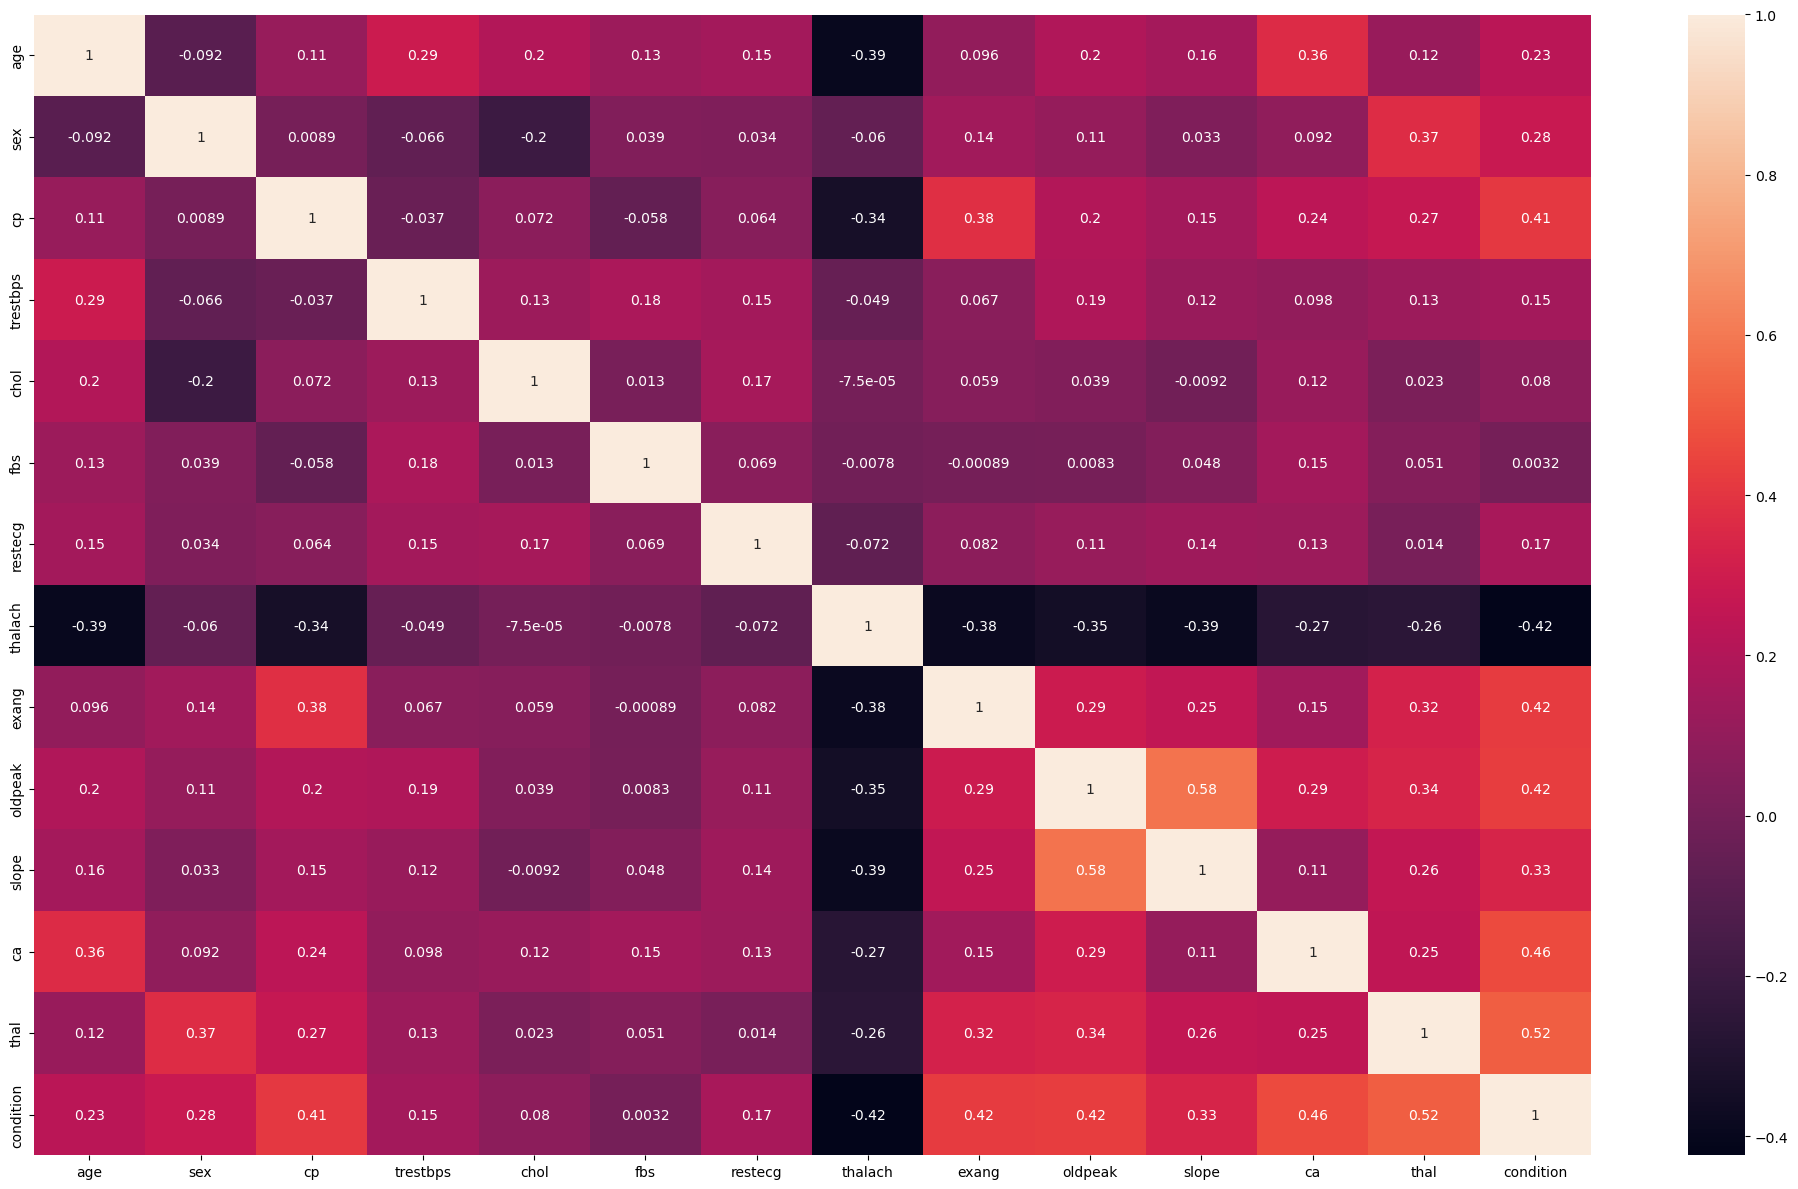

In [7]:

#which feature is negatively correlated and which is positively correlated
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

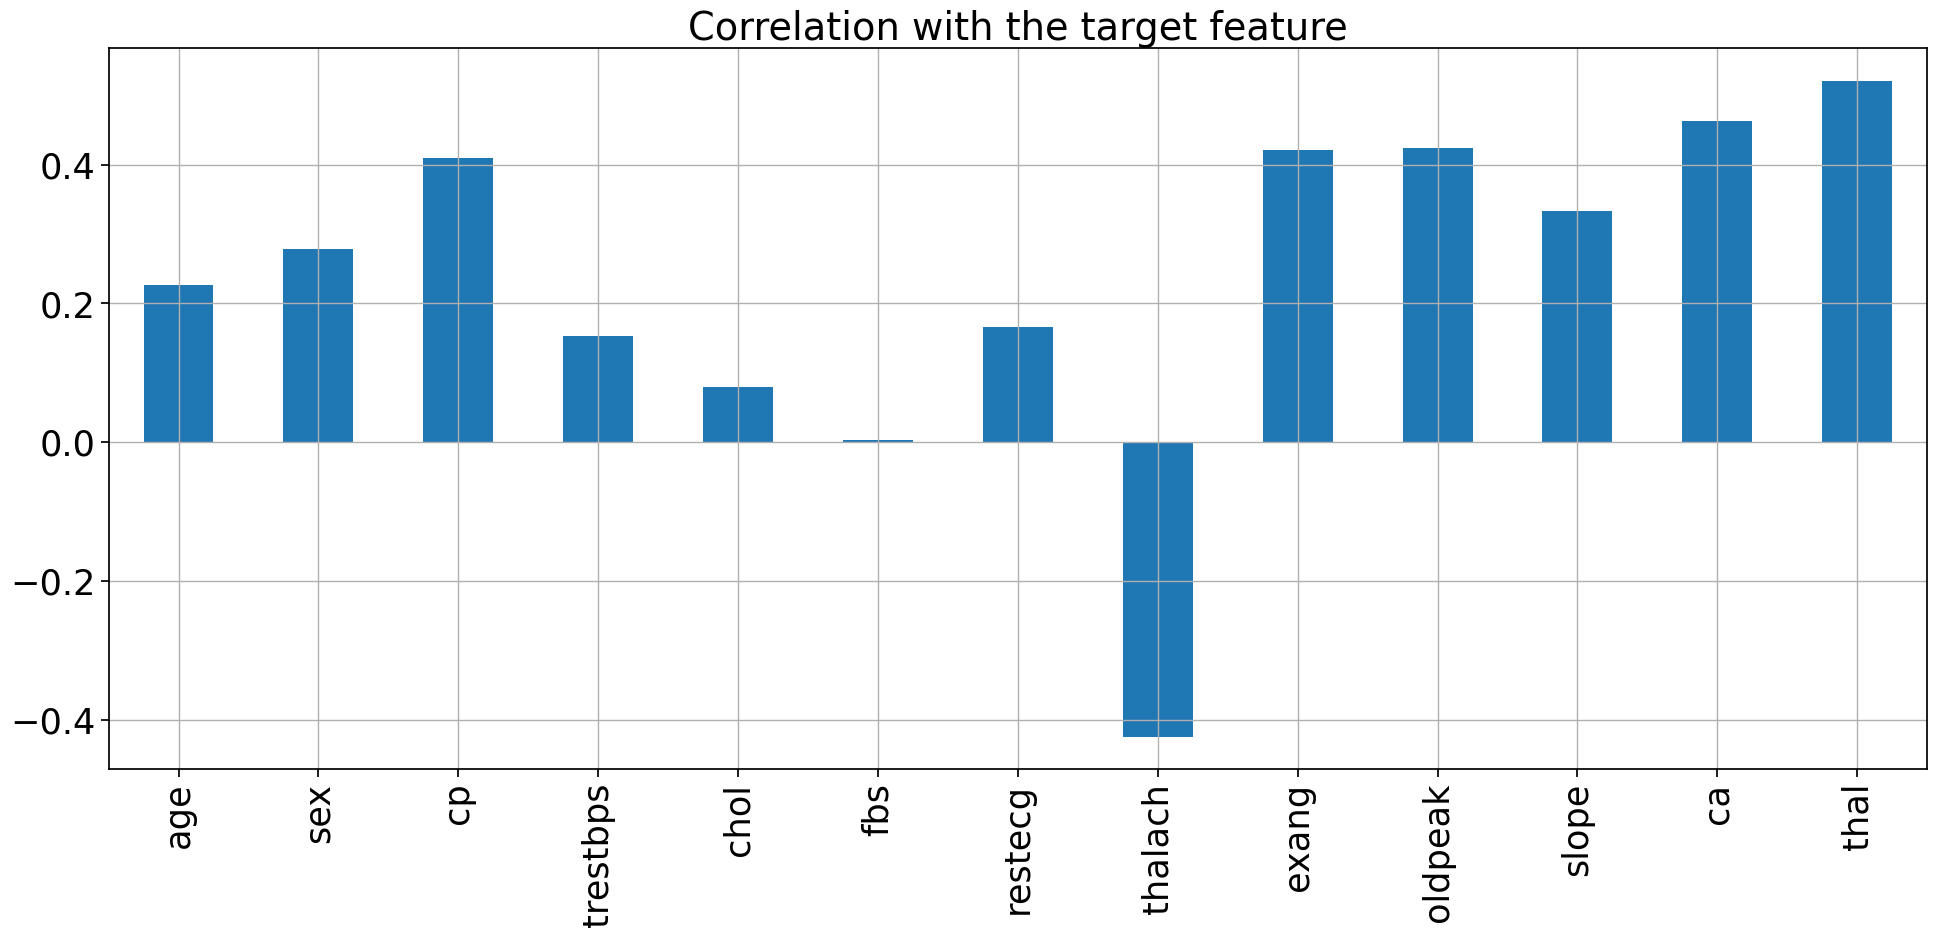

In [8]:
# Correlation with the target feature

sns.set_context('notebook',font_scale = 2.3)
df.drop('condition', axis=1).corrwith(df.condition).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [9]:
# preprocessing

df_cat=copy.copy(df)

df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [11]:
target_name = 'condition'
Y = df_cat[target_name]
X = df_cat.drop([target_name], axis=1)

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
scores=cross_val_score(rf,X,Y,cv=10)
print("Cross validation Accuracy:", scores.mean())

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(Xtrain, Ytrain)
Ypred_rf = rf.predict(Xtest)

# Compute performance metrics
accuracy_rf = accuracy_score(Ytest, Ypred_rf)
precision_rf = precision_score(Ytest, Ypred_rf)
recall_rf = recall_score(Ytest, Ypred_rf)
f1_score_rf = f1_score(Ytest, Ypred_rf)
roc_auc_rf = roc_auc_score(Ytest, rf.predict_proba(Xtest)[:, 1])

print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_score_rf)
print("ROC AUC:", roc_auc_rf)


Cross validation Accuracy: 0.8078160919540229
Random Forest Classifier Metrics:
Accuracy: 0.8444444444444444
Precision: 0.9130434782608695
Recall: 0.8076923076923077
F1 Score: 0.8571428571428572
ROC AUC: 0.9127024291497976


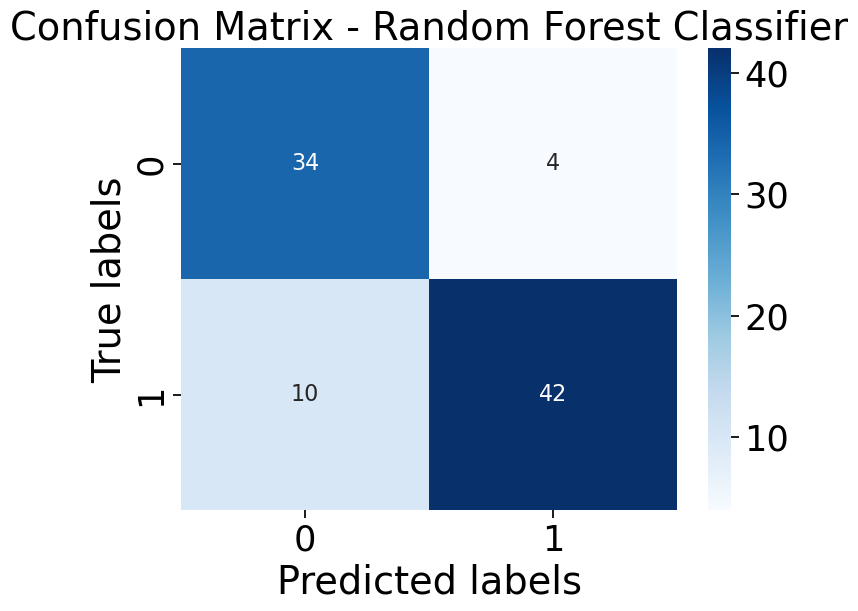

In [18]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix_rf = confusion_matrix(Ytest, Ypred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

In [19]:
# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
scores=cross_val_score(dt,X,Y,cv=10)
print("Cross validation Accuracy:",scores.mean())


dt.fit(Xtrain, Ytrain)
Ypred_dt = dt.predict(Xtest)

# Compute performance metrics
accuracy_dt = accuracy_score(Ytest, Ypred_dt)
precision_dt = precision_score(Ytest, Ypred_dt)
recall_dt = recall_score(Ytest, Ypred_dt)
f1_score_dt = f1_score(Ytest, Ypred_dt)
roc_auc_dt = roc_auc_score(Ytest, dt.predict_proba(Xtest)[:, 1])

print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_score_dt)
print("ROC AUC:", roc_auc_dt)



Cross validation Accuracy: 0.7171264367816091
Decision Tree Classifier Metrics:
Accuracy: 0.6555555555555556
Precision: 0.723404255319149
Recall: 0.6538461538461539
F1 Score: 0.6868686868686869
ROC AUC: 0.6558704453441295


Confusion Matrix for Decision Tree Classifier:


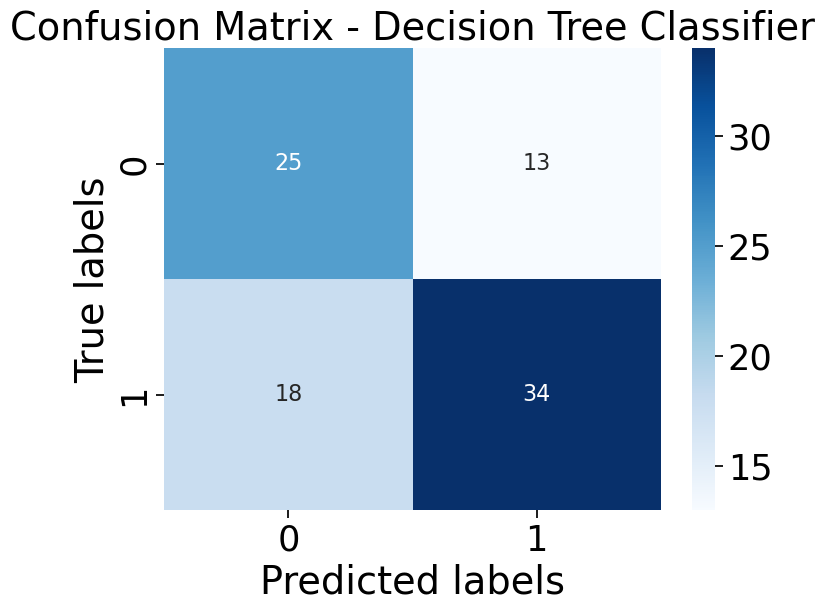

In [21]:
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(Ytest, Ypred_dt)

print("Confusion Matrix for Decision Tree Classifier:")


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

In [22]:
# SVM

In [23]:
from sklearn import svm
scores=cross_val_score(svm.SVC(kernel = 'rbf', C = 400),X,Y,cv=10)
print("Cross validation Accuracy:",scores.mean())

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='rbf', C=400)
svm_classifier.fit(Xtrain, Ytrain)
Ypred_svm = svm_classifier.predict(Xtest)

# Compute performance metrics
accuracy_svm = accuracy_score(Ytest, Ypred_svm)
precision_svm = precision_score(Ytest, Ypred_svm)
recall_svm = recall_score(Ytest, Ypred_svm)
f1_score_svm = f1_score(Ytest, Ypred_svm)
roc_auc_svm = roc_auc_score(Ytest, svm_classifier.decision_function(Xtest))

print("SVM Classifier Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_score_svm)
print("ROC AUC:", roc_auc_svm)


Cross validation Accuracy: 0.8148275862068965
SVM Classifier Metrics:
Accuracy: 0.7777777777777778
Precision: 0.9444444444444444
Recall: 0.6538461538461539
F1 Score: 0.7727272727272727
ROC AUC: 0.8982793522267206


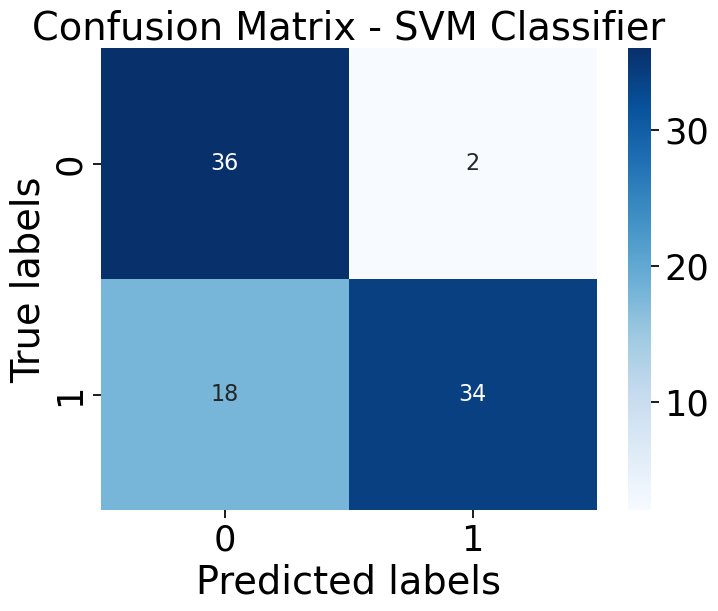

In [24]:
# Compute confusion matrix
conf_matrix_svm = confusion_matrix(Ytest, Ypred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

In [25]:
# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000)
# Perform cross-validation
scores = cross_val_score(log_reg_model, X, Y, cv=10)
print("Cross validation Accuracy:",scores.mean())

# Logistic Regression

log_reg_model.fit(Xtrain, Ytrain)
Ypred_log_reg = log_reg_model.predict(Xtest)

# Compute performance metrics
accuracy_log_reg = accuracy_score(Ytest, Ypred_log_reg)
precision_log_reg = precision_score(Ytest, Ypred_log_reg)
recall_log_reg = recall_score(Ytest, Ypred_log_reg)
f1_score_log_reg = f1_score(Ytest, Ypred_log_reg)
roc_auc_log_reg = roc_auc_score(Ytest, log_reg_model.predict_proba(Xtest)[:, 1])

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1 Score:", f1_score_log_reg)
print("ROC AUC:", roc_auc_log_reg)


Cross validation Accuracy: 0.8282758620689655
Logistic Regression Metrics:
Accuracy: 0.8555555555555555
Precision: 0.8979591836734694
Recall: 0.8461538461538461
F1 Score: 0.8712871287128713
ROC AUC: 0.9306680161943319


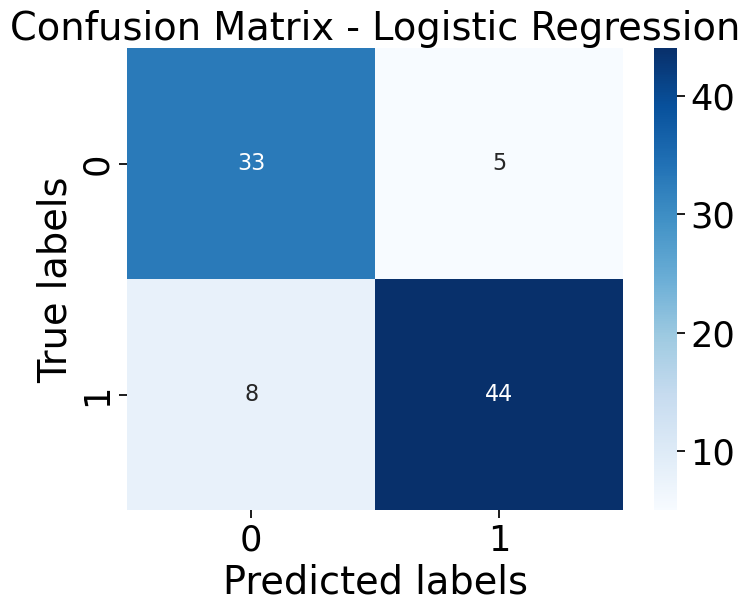

In [27]:
# Compute confusion matrix
conf_matrix_log_reg = confusion_matrix(Ytest, Ypred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [28]:
# KNN

In [29]:
# Create a KNN classifier with desired parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn_classifier, X, Y, cv=10)
mean_score = np.mean(scores)

print("Cross validation Accuracy:",scores.mean())
# K-Nearest Neighbors (KNN)

knn_classifier.fit(Xtrain, Ytrain)
Ypred_knn = knn_classifier.predict(Xtest)

# Compute performance metrics
accuracy_knn = accuracy_score(Ytest, Ypred_knn)
precision_knn = precision_score(Ytest, Ypred_knn)
recall_knn = recall_score(Ytest, Ypred_knn)
f1_score_knn = f1_score(Ytest, Ypred_knn)
roc_auc_knn = roc_auc_score(Ytest, knn_classifier.predict_proba(Xtest)[:, 1])

print("K-Nearest Neighbors (KNN) Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_score_knn)
print("ROC AUC:", roc_auc_knn)


Cross validation Accuracy: 0.6522988505747127
K-Nearest Neighbors (KNN) Metrics:
Accuracy: 0.6555555555555556
Precision: 0.8
Recall: 0.5384615384615384
F1 Score: 0.6436781609195402
ROC AUC: 0.7062246963562753


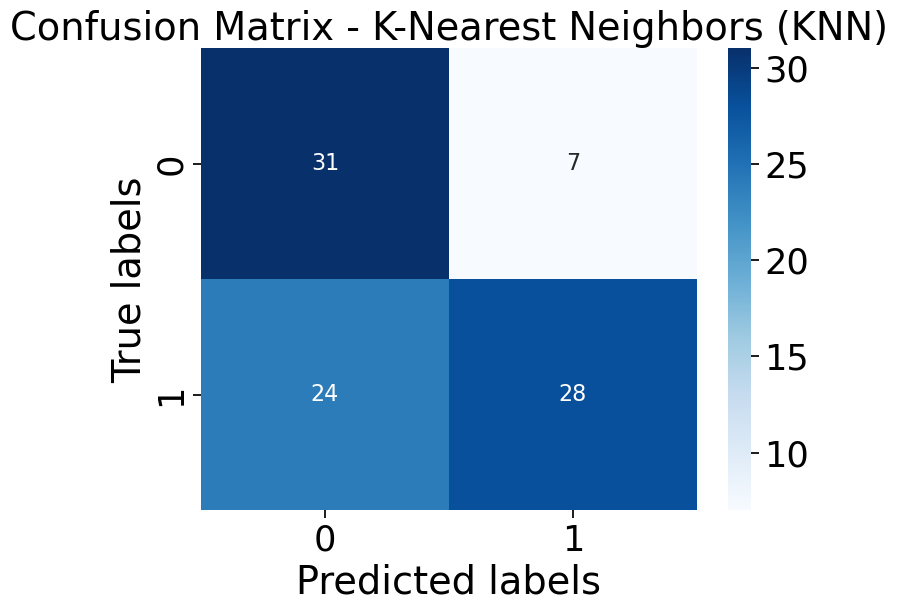

In [30]:
# Compute confusion matrix for KNN
conf_matrix_knn = confusion_matrix(Ytest, Ypred_knn)

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - K-Nearest Neighbors (KNN)")
plt.show()

In [31]:
# Ensemble the models Logistic Regression and Random Forest


from sklearn.ensemble import VotingClassifier


# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg_model), ('rf', rf)], voting='soft')

# Train the voting classifier
voting_clf.fit(Xtrain, Ytrain)

# Make predictions
Ypred_voting = voting_clf.predict(Xtest)

# Compute performance metrics
accuracy_voting = accuracy_score(Ytest, Ypred_voting)
precision_voting = precision_score(Ytest, Ypred_voting)
recall_voting = recall_score(Ytest, Ypred_voting)
f1_score_voting = f1_score(Ytest, Ypred_voting)
roc_auc_voting = roc_auc_score(Ytest, voting_clf.predict_proba(Xtest)[:, 1])

print("Voting Classifier Metrics of Logistic Regression and Random Forest :")
print("Accuracy:", accuracy_voting)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_score_voting)
print("ROC AUC:", roc_auc_voting)


Voting Classifier Metrics of Logistic Regression and Random Forest :
Accuracy: 0.8666666666666667
Precision: 0.9166666666666666
Recall: 0.8461538461538461
F1 Score: 0.8799999999999999
ROC AUC: 0.9286437246963563


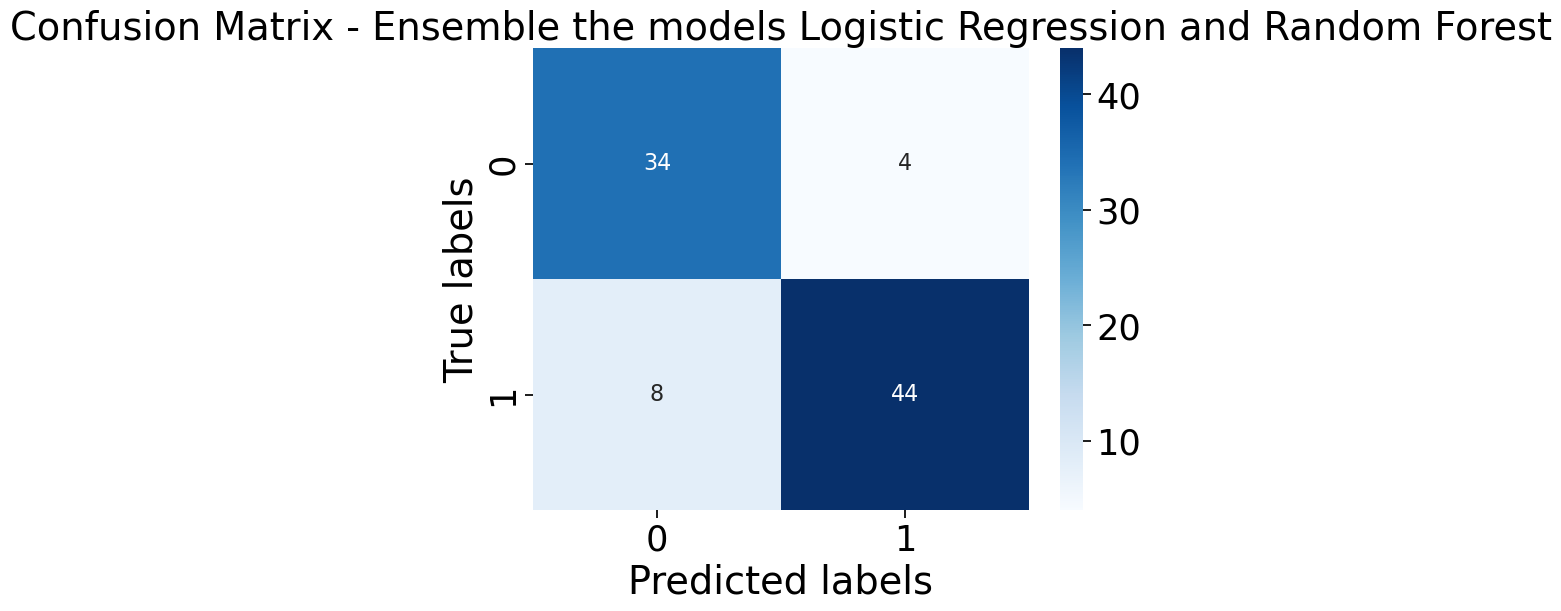

In [32]:
# Compute confusion matrix for Voting Classifier
conf_matrix_voting = confusion_matrix(Ytest, Ypred_voting)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Ensemble the models Logistic Regression and Random Forest")
plt.show()

In [33]:
# Ensemble the models  Random Forest and SVM

# Create SVM classifier with probability estimates enabled
svm_model = SVC(probability=True)


# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf)], voting='soft')

# Train the voting classifier
voting_clf.fit(Xtrain, Ytrain)

# Make predictions
Ypred_voting = voting_clf.predict(Xtest)

# Compute performance metrics
accuracy_voting = accuracy_score(Ytest, Ypred_voting)
precision_voting = precision_score(Ytest, Ypred_voting)
recall_voting = recall_score(Ytest, Ypred_voting)
f1_score_voting = f1_score(Ytest, Ypred_voting)
roc_auc_voting = roc_auc_score(Ytest, voting_clf.predict_proba(Xtest)[:, 1])

print("Voting Classifier Metrics of Random Forest and SVM:")
print("Accuracy:", accuracy_voting)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_score_voting)
print("ROC AUC:", roc_auc_voting)


Voting Classifier Metrics of Random Forest and SVM:
Accuracy: 0.8
Precision: 0.925
Recall: 0.7115384615384616
F1 Score: 0.8043478260869567
ROC AUC: 0.9099190283400811


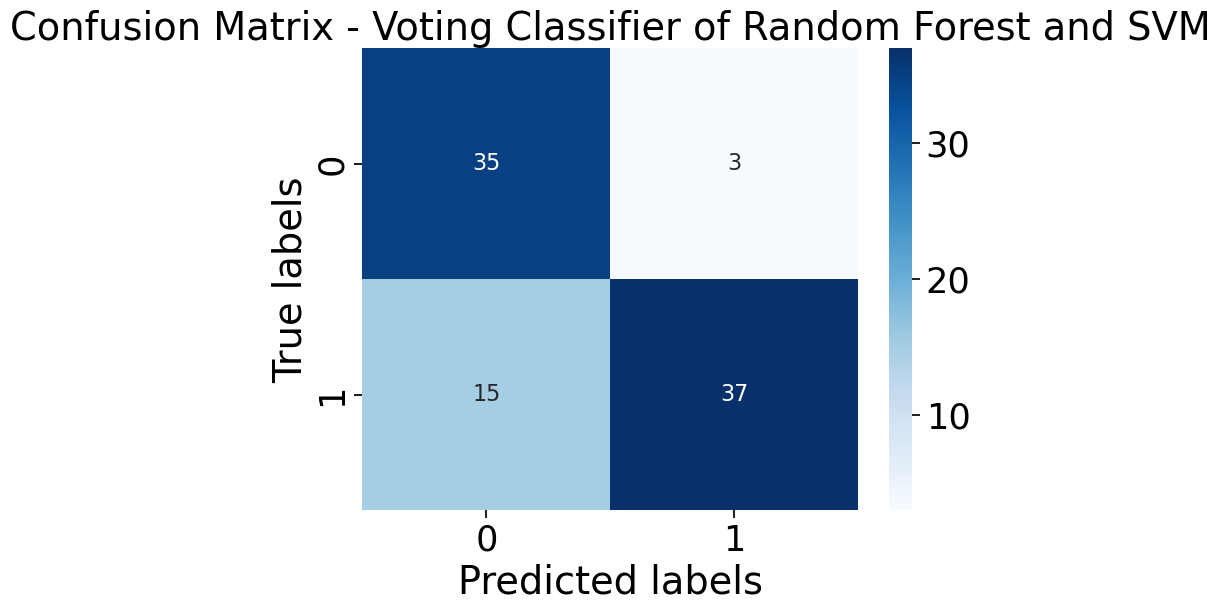

In [34]:
# Compute confusion matrix
conf_matrix_voting = confusion_matrix(Ytest, Ypred_voting)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Voting Classifier of Random Forest and SVM")
plt.show()

In [35]:
# Ensemble the models Logistic Regression and SVM
from sklearn.ensemble import VotingClassifier


# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg_model), ('svm', svm_model)], voting='soft')

# Train the voting classifier
voting_clf.fit(Xtrain, Ytrain)

# Make predictions
Ypred_voting = voting_clf.predict(Xtest)

# Compute performance metrics
accuracy_voting = accuracy_score(Ytest, Ypred_voting)
precision_voting = precision_score(Ytest, Ypred_voting)
recall_voting = recall_score(Ytest, Ypred_voting)
f1_score_voting = f1_score(Ytest, Ypred_voting)
roc_auc_voting = roc_auc_score(Ytest, voting_clf.predict_proba(Xtest)[:, 1])

print("Voting Classifier Metrics of Logistic Regression and SVM:")
print("Accuracy:", accuracy_voting)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_score_voting)
print("ROC AUC:", roc_auc_voting)



Voting Classifier Metrics of Logistic Regression and SVM:
Accuracy: 0.8444444444444444
Precision: 0.9318181818181818
Recall: 0.7884615384615384
F1 Score: 0.8541666666666667
ROC AUC: 0.9225708502024291


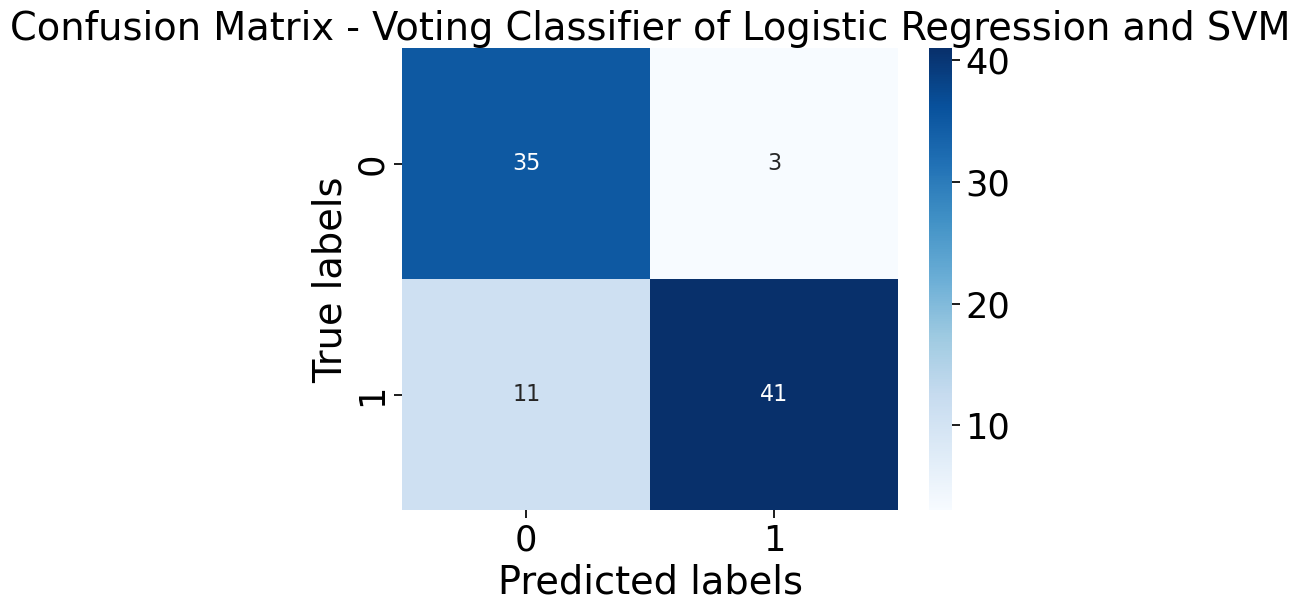

In [36]:
# Compute confusion matrix
conf_matrix_voting = confusion_matrix(Ytest, Ypred_voting)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Voting Classifier of Logistic Regression and SVM")
plt.show()


In [37]:
# Ensemble the models Logistic Regression,Random Forest  and SVM
# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg_model), ('rf', rf), ('svm', svm_model)], voting='soft')

# Train the voting classifier
voting_clf.fit(Xtrain, Ytrain)

# Make predictions
Ypred_voting = voting_clf.predict(Xtest)

# Compute performance metrics
accuracy_voting = accuracy_score(Ytest, Ypred_voting)
precision_voting = precision_score(Ytest, Ypred_voting)
recall_voting = recall_score(Ytest, Ypred_voting)
f1_score_voting = f1_score(Ytest, Ypred_voting)
roc_auc_voting = roc_auc_score(Ytest, voting_clf.predict_proba(Xtest)[:, 1])

print("Voting Classifier Metrics of Logistic Regression,Random Forest  and SVM:")
print("Accuracy:", accuracy_voting)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_score_voting)
print("ROC AUC:", roc_auc_voting)

Voting Classifier Metrics of Logistic Regression,Random Forest  and SVM:
Accuracy: 0.8444444444444444
Precision: 0.9318181818181818
Recall: 0.7884615384615384
F1 Score: 0.8541666666666667
ROC AUC: 0.9326923076923077


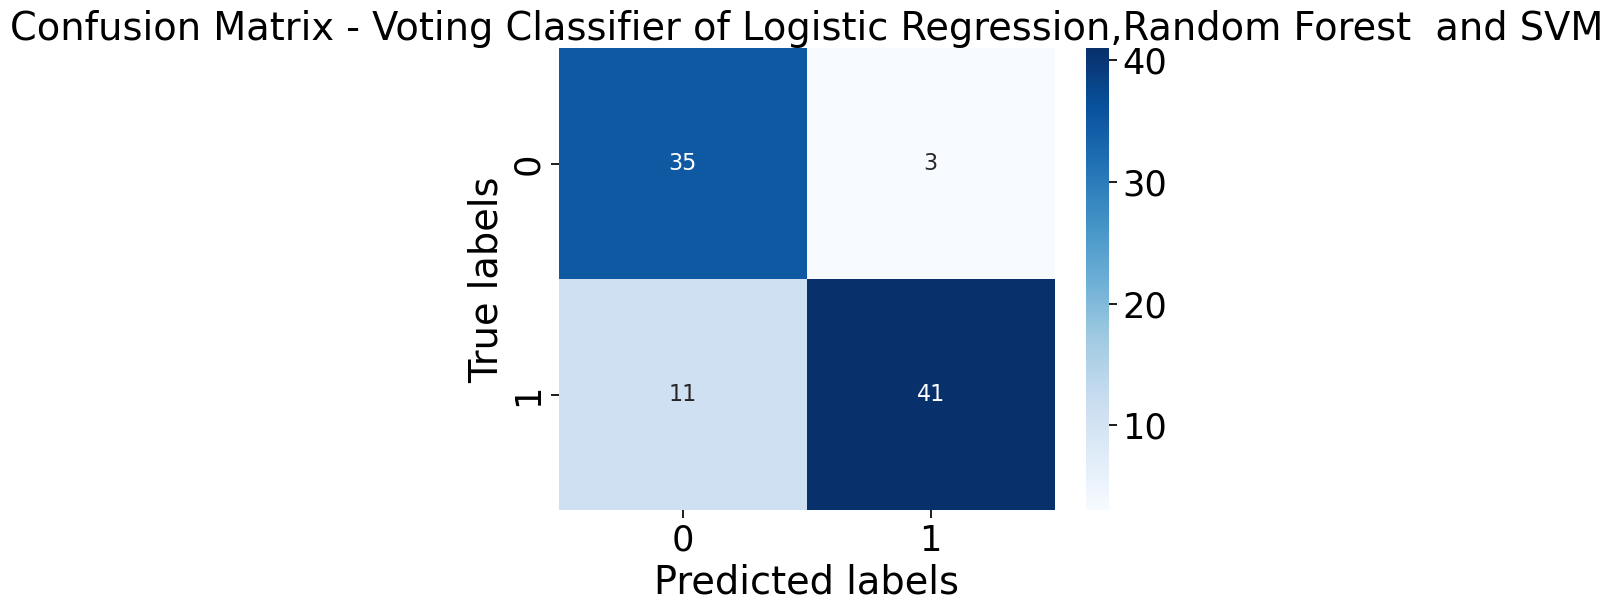

In [38]:
# Compute confusion matrix
conf_matrix_voting = confusion_matrix(Ytest, Ypred_voting)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Voting Classifier of Logistic Regression,Random Forest  and SVM")
plt.show()